In [153]:
# Reload files
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Map generator prototype

This is a test python jupyter notebook to test generating maps for `Impatient drivers simulation`

map-pieces will contain a folder with map pieces imagesd and a json file containing data about each piece.

- each pece is 100x100 pixels

In [154]:
%matplotlib inline
import matplotlib.pyplot as plt

import cv2 as cv
import numpy as np
import json

In [155]:
# Local Import
from src.Map.MapGrid import MapGrid

In [156]:
# Vars
map_pieces_folder = "map_pieces"
map_pieces_info_path = f"{map_pieces_folder}/pieces_info.json"

In [157]:
# load json assets file
with open(map_pieces_info_path, "r") as f:
    map_pieces = json.loads(f.read())

In [158]:
# Parse Json
for piece in map_pieces["Pieces"]:
    print(piece["name"], "Path:", piece["image_path"])

    # Load Map Images
    piece["image"] = cv.imread(f'{map_pieces_folder}/{piece["image_path"]}')

Straight Path: Straight.png
Turn Path: Turn.png
3WayIntersection Path: 3WayIntersection.png
4WayIntersection Path: 4WayIntersection.png
Roundabout Path: Roundabout.png
Filler Path: Filler.png
BigDiagonalLeft Path: BigDiagonalLeft.png
BigDiagonalRight Path: BigDiagonalRight.png


In [159]:
# Init MapGrid
testMap = MapGrid(map_pieces)

Initilizing Map
Process Data for set: Basic Roads


Border coords: ((0, 0), (0, 0))
Map dimensions: ((1, 1), (0, 0), (0, 0))
Map pixels: w:100, h:100
Start coords: (0, 0)


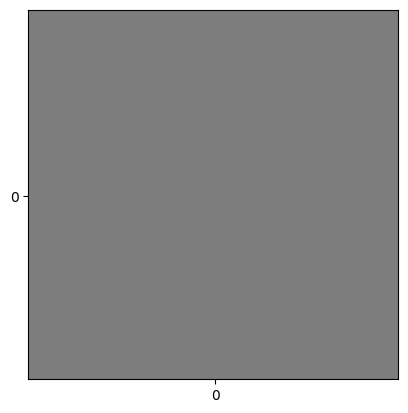

In [160]:
# Map Drawing
def draw_map(mapGrid: MapGrid):
    map_size, start_coords, end_coords = mapGrid.getDimensions()
    piece_size = 100

    map_w = map_size[0] * piece_size
    map_h = map_size[1] * piece_size
    print(f"Map pixels: w:{map_w}, h:{map_h}")
    
    plt.imshow(mapGrid.renderMap())
    plt.xticks(range(int(piece_size/2), map_w, piece_size), labels = range(start_coords[0], start_coords[0] + map_size[0]))
    plt.yticks(range(int(piece_size/2), map_h, piece_size), labels = range(start_coords[1] + map_size[1] - 1,start_coords[1] -1, -1));

# Coords
print("Border coords:", testMap.getBorderCoords())
print("Map dimensions:", testMap.getDimensions())
draw_map(testMap)

images to load - 4


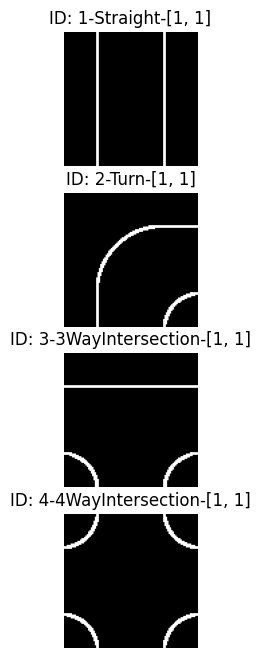

In [161]:
# Load map images:
n_limit = 4 # limit the pics
n_pictures = min(len(testMap.pieces), n_limit)
print(f"images to load - {n_pictures}")

picture_ids = list(testMap.pieces.keys())[:n_pictures]

fig, ax = plt.subplots(nrows=n_pictures,
                       ncols=1,
                       figsize = (2, n_pictures*2))

# Plot  for each different axis
for i in range(n_pictures):
    title = f'ID: {testMap.pieces[picture_ids[i]].id}-{testMap.pieces[picture_ids[i]].name}-{testMap.pieces[picture_ids[i]].size}'
    ax[i].set(title=title)
    ax[i].imshow(testMap.pieces[picture_ids[i]].image)
    ax[i].axis('off')

Initilizing Map
Process Data for set: Basic Roads
Border coords: ((-3, -2), (3, 2))
Map pixels: w:700, h:500
Start coords: (-3, -2)


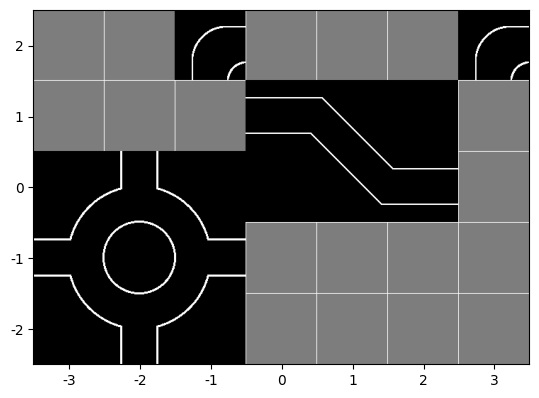

In [162]:
testMap = MapGrid(map_pieces)

elements_list = [
(8, 3, (0,0)),
(5, 3, (-3,-2)),
(2, 0, (3,2)),
(2, 0, (-1,2))  
]

for item in elements_list:
    testMap.addItem(item[0], item[1], item[2])

# Coords
print("Border coords:", testMap.getBorderCoords())

draw_map(testMap)

In [163]:
testMap = MapGrid(map_pieces)

elements_list = [
(7, 0, (0,0)),
(1, 0, (4,5)),
(3, 0, (4,6)),
(5, 0, (1,2)),
(20, 0, (4,5)),
(5, 0, (-2, -2)),
(8, 1, (3, 2))
]

for item in elements_list:
    try:
        testMap.addItem(item[0], item[1], item[2])
    except Exception as e:
        print(f"unable to add {item}, {e}")

Initilizing Map
Process Data for set: Basic Roads
unable to add (5, 0, (1, 2)), Area occupied: (1, 2)
unable to add (20, 0, (4, 5)), Invalid piece ID: 20
unable to add (5, 0, (-2, -2)), Area occupied: (-2, -2)


Map pixels: w:600, h:700
Start coords: (0, 0)


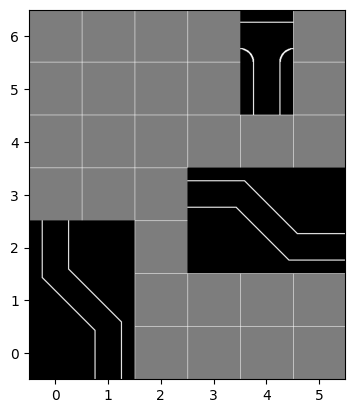

In [164]:
coords = (0, 0)
size = (0, 0)

if not testMap.checkCoords(coords, size):
    print("occupied")
    elementsInArea = testMap.getItemsFromCoords(coords, size)
    print("Elements")
    for element in elementsInArea:
        print(element, "Name:" ,testMap.pieces[element['ID']].name)


draw_map(testMap)

In [165]:
def getConnectionPoints(self: MapGrid):

    # get connection points
    for element in self.mapElements:
        elementID = element['ID']
        elementCoords = element['coords']
        elementRotation = element['rotation']

        elementName = self.pieces[element['ID']].name
        elementConnections = self.pieces[element['ID']].connections
        elementSize = self.pieces[element['ID']].size

        print(f"Found ID: {elementID}")
        print(f"Name: {elementName}")
        print(f"Coords: {elementCoords}")
        print(f"Rotation: {elementRotation}")


        elementConnections = self.pieces[element['ID']].connections

        print(f"Connections : {elementConnections}")

       


        print("")

getConnectionPoints(testMap)

Found ID: 7
Name: BigDiagonalLeft
Coords: (0, 0)
Rotation: 0
Connections : (((0, 0), (0, 1)), ((2, 1), (0, -1)))

Found ID: 1
Name: Straight
Coords: (4, 5)
Rotation: 0
Connections : (((0, 0), (0, 1)), ((0, 0), (0, -1)))

Found ID: 3
Name: 3WayIntersection
Coords: (4, 6)
Rotation: 0
Connections : (((0, 0), (0, -1)), ((0, 0), (1, 0)), ((0, 0), (-1, 0)))

Found ID: 8
Name: BigDiagonalRight
Coords: (3, 2)
Rotation: 1
Connections : (((0, 1), (0, 1)), ((2, 0), (0, -1)))



In [166]:
testList = [[0,1], [1,0]], [[0,1], [1,0]]

for el in testList:
    print(el)
    for par in el:
        print(tuple(par))

testTupple = tuple(tuple(tuple(el) for el in par) for par in testList)
print(testList)
print(testTupple)

[[0, 1], [1, 0]]
(0, 1)
(1, 0)
[[0, 1], [1, 0]]
(0, 1)
(1, 0)
([[0, 1], [1, 0]], [[0, 1], [1, 0]])
(((0, 1), (1, 0)), ((0, 1), (1, 0)))
